Imports essential libraries for data analysis and visualization. **pandas** and **numpy** are used for data manipulation and numerical operations, while  **matplotlib** and **seaborn** are used for creating static and statistical visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

upload your dataset on G drive and mount google drive to get dataset from g drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers dataset.csv")   # set dataset path

In [58]:
df.head(10)   # disply first 10 rows

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [59]:
df.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
690,691,Female,42,103,98
691,692,Female,23,17,93
692,693,Female,20,93,76
693,694,Male,43,71,42
694,695,Female,43,129,91
695,696,Female,48,88,61
696,697,Male,61,45,6
697,698,Female,41,49,38
698,699,Female,65,96,28
699,700,Female,19,106,99


In [60]:
df.shape

(700, 5)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              700 non-null    int64 
 1   Genre                   700 non-null    object
 2   Age                     700 non-null    int64 
 3   Annual Income (k$)      700 non-null    int64 
 4   Spending Score (1-100)  700 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 27.5+ KB


In [62]:
df1= df.iloc[:, [3,4]].values    #from index 0 getting vaalue column 3 and 4

column_names = df.columns[[3, 4]]

print("Column names:", column_names.tolist())
df1

Column names: ['Annual Income (k$)', 'Spending Score (1-100)']


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       ...,
       [ 49,  38],
       [ 96,  28],
       [106,  99]])

In [63]:
from sklearn.cluster import KMeans
wcss = []  #within cluster sum of square

loop applies the k-means clustering algorithm to a dataset df1 for a range of cluster counts (from 1 to 10). For each cluster count, it initializes the k-means algorithm, fits it to the data, and appends the resulting within-cluster sum of squares (WCSS) to the wcss list. The wcss values are used to evaluate the clustering performance for different numbers of clusters.

In [64]:

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [65]:
print("WCSS values:", wcss)
print("Number of WCSS values:", len(wcss))

WCSS values: [1391737.368571429, 790392.2105106001, 533657.744035009, 376110.7237612773, 294361.6072272953, 230572.70318415132, 184781.148742596, 162650.66882033713, 145799.33596497, 132267.06063135865]
Number of WCSS values: 10


plots the within-cluster sum of squares (WCSS) values against the number of clusters (ranging from 1 to 10) to visualize the "elbow method," which helps determine the optimal number of clusters for k-means clustering by identifying the point where the rate of decrease in WCSS slows down, indicating diminishing returns in clustering quality with additional clusters.

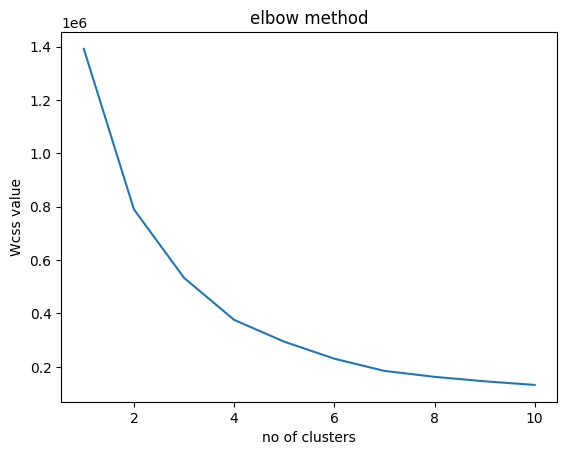

In [66]:
plt.plot(range(1,11), wcss)
plt.title("elbow method")
plt.xlabel('no of clusters')
plt.ylabel('Wcss value')
plt.show()

initializes and fits a k-means clustering model with 4 clusters to the dataset df1, assigning each data point to its corresponding cluster and storing the cluster assignments in y_kmeans.

In [68]:
kmeans_model = KMeans(n_clusters= 4, init= 'k-means++' ,random_state= 0)

In [69]:
y_kmeans = kmeans_model.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


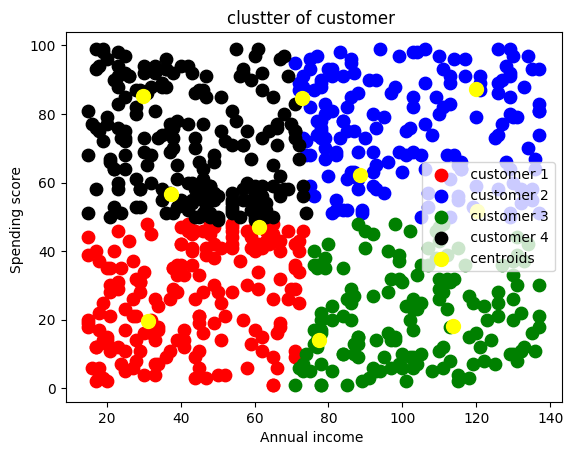

In [70]:
plt.scatter(df1[y_kmeans == 0, 0 ], df1[y_kmeans == 0,1], s= 80 , c ='red', label= ' customer 1')
plt.scatter(df1[y_kmeans == 1, 0 ], df1[y_kmeans == 1,1], s= 80 , c ='blue', label= ' customer 2')
plt.scatter(df1[y_kmeans == 2, 0 ], df1[y_kmeans == 2,1], s= 80 , c ='green', label= ' customer 3')
plt.scatter(df1[y_kmeans == 3, 0 ], df1[y_kmeans == 3,1], s= 80 , c ='black', label= ' customer 4')

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[:, 1], s= 100 , c ='yellow' , label= ' centroids' )
plt.title("clustter of customer ")
plt.xlabel('Annual income ')
plt.ylabel('Spending score ')
plt.legend()
plt.show()

The image represents the results of a K-means clustering analysis on customers based on their annual income and spending score. There are four clusters: low-income low-spending (red), high-income high-spending (blue), low-income high-spending (black), and high-income low-spending (green). Yellow points indicate the centroids of each cluster, showing the central tendency of each group's characteristics. This clustering helps in identifying distinct customer segments for targeted marketing strategies